# Download mnist dataset


In [4]:
#Import the tensorflow.keras.datasets.mnist module so we can load the dataset
from tensorflow.keras.datasets import mnist

In [5]:
#Now load the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Explore the mnist dataset

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

# Visulise the dataset

In [10]:
#Import matplotlib
import matplotlib.pyplot as plt

In [11]:
#Import seaborn
import seaborn as sns

In [12]:
#Select the font scale
sns.set(font_scale=2)

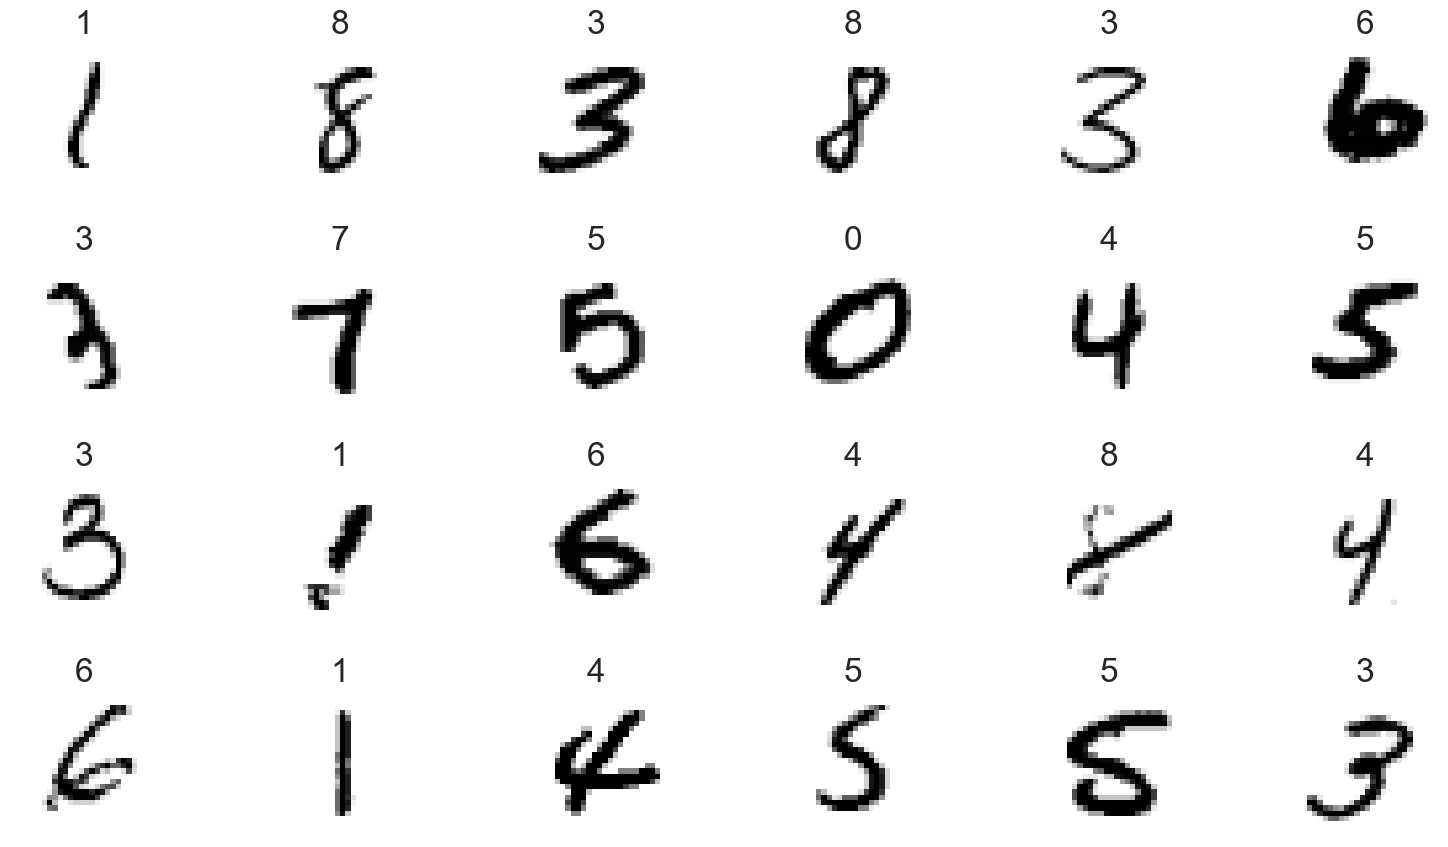

In [13]:
#Run this snippet multiple times to see additional randomly selected digits.
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

# Data Preparation
## Reshaping the Image Data

In [14]:
#CNN require images to be in the shape (width, height, channels)
#Reshape the X_train dataset
#Why channels is 1 in this case, answer using another # line
X_train = X_train.reshape((60000, 28, 28, 1))

In [15]:
#Check the shape now, what has changed
X_train.shape

(60000, 28, 28, 1)

In [16]:
#Now do the same for X_test
X_test = X_test.reshape((10000, 28, 28, 1))

In [17]:
#Check the shape now
X_test.shape

(10000, 28, 28, 1)

# Normalizing the Image Data

In [18]:
#Do you still remember what is normalisation?
#Write it here
#Now normalise the X_train
X_train = X_train.astype('float32') / 255

In [19]:
#Do the same for X_test
X_test = X_test.astype('float32') / 255

# One-Hot Encoding: Converting the Labels From Integers to Categorical Data

In [20]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [21]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [22]:
y_test = to_categorical(y_test)
y_test.shape
#Explain what has changed and why using a new # line

(10000, 10)

# Creating the Neural Network

In [23]:
#Import sequential from keras models
from tensorflow.keras.models import Sequential
cnn = Sequential()

# Adding Layers to the Network

In [24]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

# Adding a Convolution Layer

In [25]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
#Define activation function?

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Dimensionality of the First Convolution Layer’s Output

# Adding a Pooling Layer

In [26]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))
#What is max pooling techanique and why it is used?

# Adding Another Convolutional Layer and Pooling Layer

In [27]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the Results

In [28]:
cnn.add(Flatten())

# Adding a Dense Layer to Reduce the Number of Features

In [29]:
cnn.add(Dense(units=128, activation='relu'))

# Adding Another Dense Layer to Produce the Final Output

In [30]:
cnn.add(Dense(units=10, activation='softmax'))

# Printing the Model’s Summary

In [31]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

# Visualizing a Model’s Structure

In [33]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
            show_layer_names=True)
Image(filename='convnet.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


FileNotFoundError: [Errno 2] No such file or directory: 'convnet.png'

# Compiling the Model

In [ ]:
cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


# Training and Evaluating the Model

In [ ]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64,
              validation_split=0.1)

# Evaluating the Model

In [ ]:
loss, accuracy = cnn.evaluate(X_test, y_test)

In [ ]:
loss

In [ ]:
accuracy

# Making Predictions

In [ ]:
predictions = cnn.predict(X_test)

In [ ]:
y_test[0]

In [ ]:
for index, probability in enumerate(predictions[0]):
          print(f'{index}: {probability:.10%}')

# Locating the Incorrect Predictions

In [ ]:
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [ ]:
len(incorrect_predictions)

# Visualizing Incorrect Predictions

In [ ]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) # remove x-axis tick marks
    axes.set_yticks([]) # remove y-axis tick marks
    axes.set_title(
        f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

# Displaying the Probabilities for Several Incorrect Predictions

In [ ]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')


In [ ]:
display_probabilities(predictions[495])

In [ ]:
display_probabilities(predictions[583])

# Saving and Loading a Model

In [ ]:
#Save the model in a directory
!mkdir -p saved_model
cnn.save('saved_model/mnist_cnn.h5')

In [ ]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/model.h5



In [ ]:
# Load the model
from tensorflow.keras.models import load_model
cnn = load_model('saved_model/mnist_cnn.h5')
# Check its architecture
cnn.summary()